 Exploration 1 - Gauss's Circle Conjecture
 

In [6]:
import math
import numpy as np
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt

We begin with a no optimizations brute force approach that simply parses each $x$ value in the set $\{0, 1,...,r\}$, and each $y$ value in the set $\{1, ..., r\}$, and checks if $x^2+y^2 < r^2$ and if so adds it as a lattice point. However this only counts the lattice points in one quadrant of the circle, so we multiply the final count by 4, and finally we add 1 for the point $(0, 0)$ which is skipped.

In [7]:
def bf_L(r):
    lattice_points = 0
    for i in range(r+1):
        for j in range(1,r+1):
            if i**2 + j**2 < r**2:
                lattice_points += 1
    return 4*lattice_points + 1

In [8]:
import math

def A(r):
  return r**2*math.pi


def L(r):
  i = 1
  ans = 0
  while(i <= r):
    ans += math.floor(math.sqrt(r**2 - i**2)) + 1
    i += 1
  return 1 + ans * 4


def E(r):
  return A(r) - L(r)


To get a sense of how the error grows with R, we will perform a power regression on a list of values from the function E.

In [ ]:
x = []
y = []


print("Creating list of errors, in log space so we can do a linear regression")
for i in range(1, 1000):
  error = E(i)
  if error > 0:
    x.append(math.log(i))
    y.append(math.log(E(i)))
print("Finished")



c, stats = P.polyfit(x,y,1,full=True)
print("\nResult...\n",c)
print("\nResult...\n",stats)

Creating list of errors, in log space so we can do a linear regression
Finished

Result...
 [-0.2399114   0.67853623]

Result...
 [array([359.13952698]), 2, array([1.41013425, 0.10733775]), 2.1760371282653068e-13]


Plotting graphs so we can get a better look

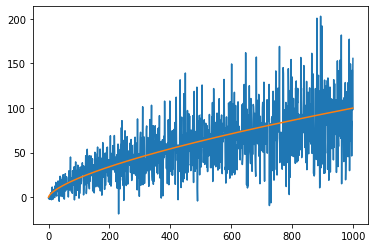

In [23]:
import matplotlib.pyplot as plt


x = []
error_y = []
r_2_3 = []

for i in range(1000):
    x.append(i)
    error_y.append(E(i))
    r_2_3.append(i**(2/3))

fig, ax = plt.subplots()
ax.plot(x, error_y)
ax.plot(x, r_2_3)
plt.show()